In [37]:
!pip install pmdarima

In [38]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
import yfinance as yf

In [40]:
# prompt:

stock_data = yf.download('TATAMOTORS.NS', start='2012-01-01', end='2024-04-15')


[*********************100%%**********************]  1 of 1 completed


In [41]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [42]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-05,1011.599976,1012.500000,1004.400024,1007.099976,1007.099976,4519120
2024-04-08,1010.049988,1016.400024,1004.000000,1013.200012,1013.200012,5188052
2024-04-09,1021.000000,1029.500000,1005.000000,1008.500000,1008.500000,8539041
2024-04-10,1012.250000,1021.000000,1010.000000,1013.500000,1013.500000,4554077
2024-04-12,1014.000000,1029.000000,1013.500000,1018.500000,1018.500000,11575194


In [43]:
# prompt:

# Print the first five rows of the data
print(stock_data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-02  179.029724  183.086212  176.902542  181.997894  176.190002   
2012-01-03  184.273483  192.732742  184.224014  191.891769  185.768158   
2012-01-04  191.792831  200.351028  190.951843  199.064835  192.712311   
2012-01-05  198.817490  203.566544  198.075439  199.955276  193.574341   
2012-01-06  197.877563  202.824509  196.393478  201.439362  195.011063   

              Volume  
Date                  
2012-01-02  10175802  
2012-01-03  15868503  
2012-01-04  22752471  
2012-01-05  21640778  
2012-01-06  13553191  


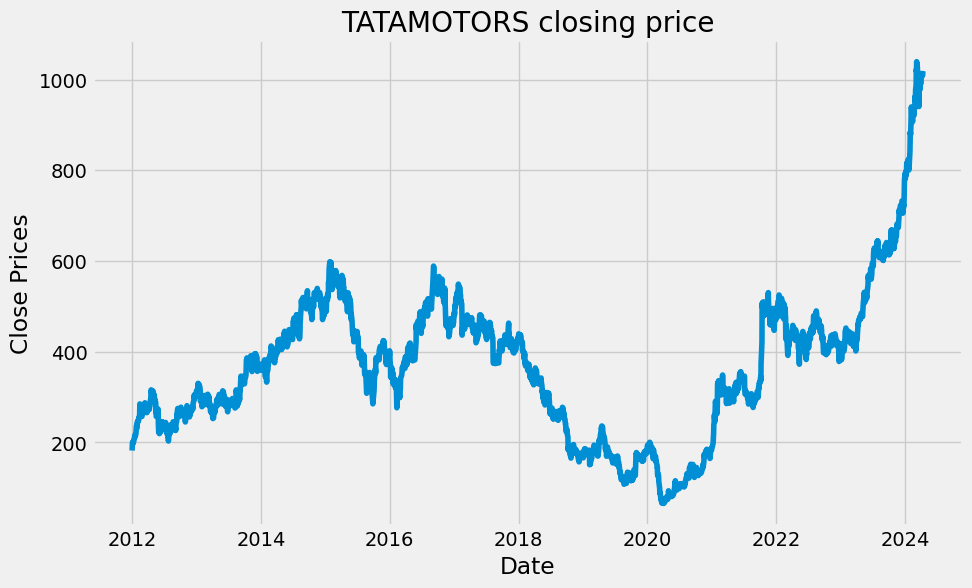

In [44]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title("TATAMOTORS closing price")
plt.show()

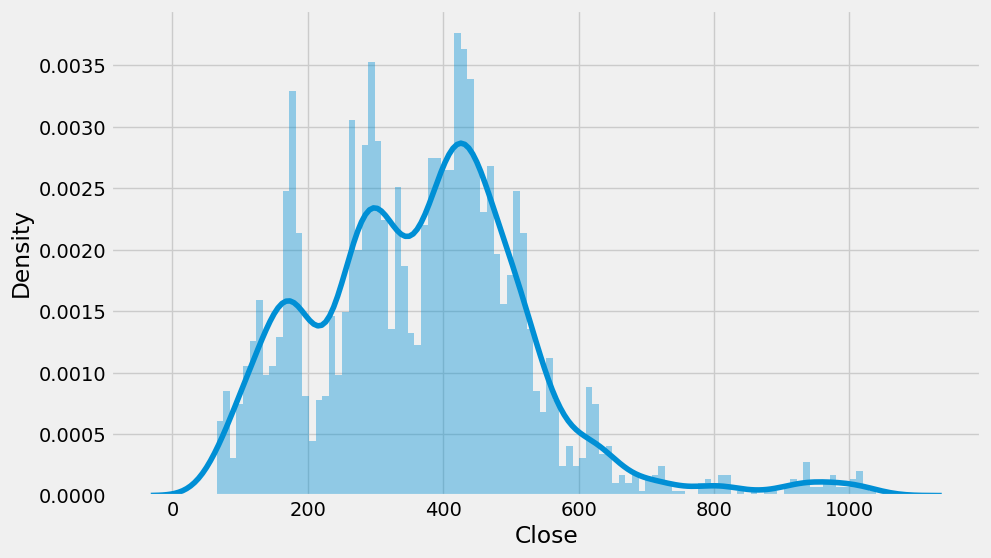

In [45]:

import seaborn as sns

sns.distplot(stock_data['Close'], bins=100)
plt.show()


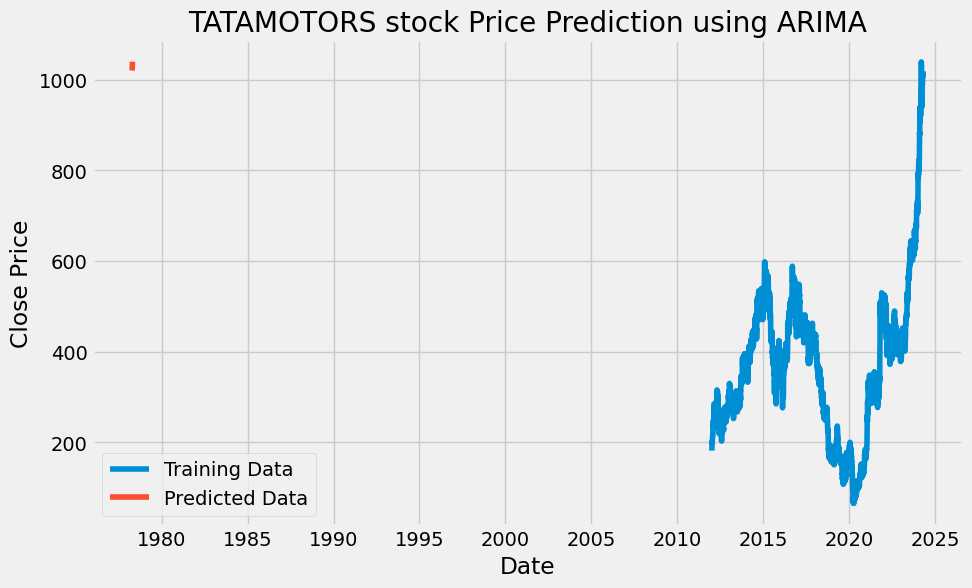

In [46]:
#arima model for this stock

model = auto_arima(stock_data['Close'], seasonal=True, m=12)
model.fit(stock_data['Close'])

forecast = model.predict(start='2021-01-01', end='2021-12-31')

plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Training Data')
plt.plot(forecast, label='Predicted Data')
plt.title('TATAMOTORS stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

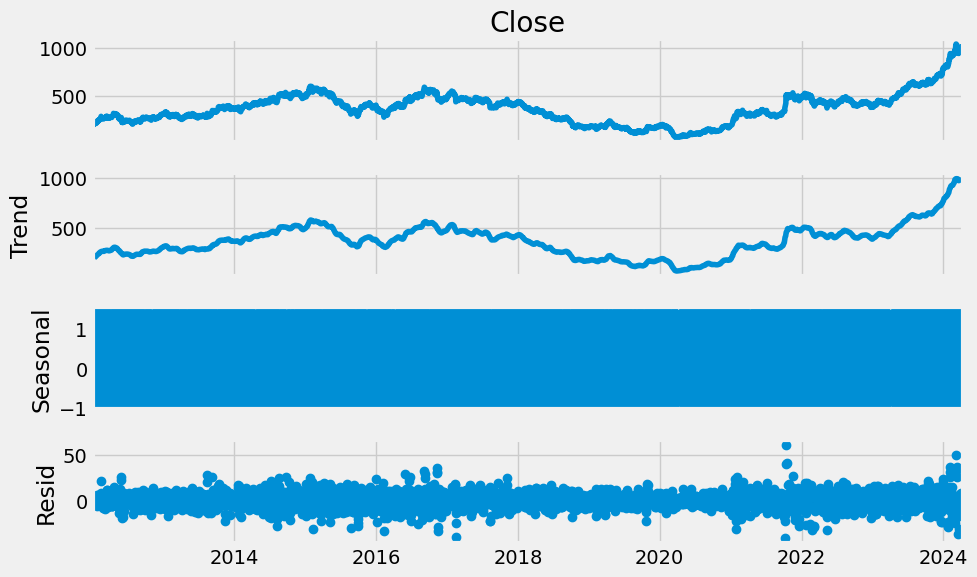

In [47]:


import statsmodels.api as sm

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(stock_data['Close'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(10,6))
decomposition.plot()
plt.show()


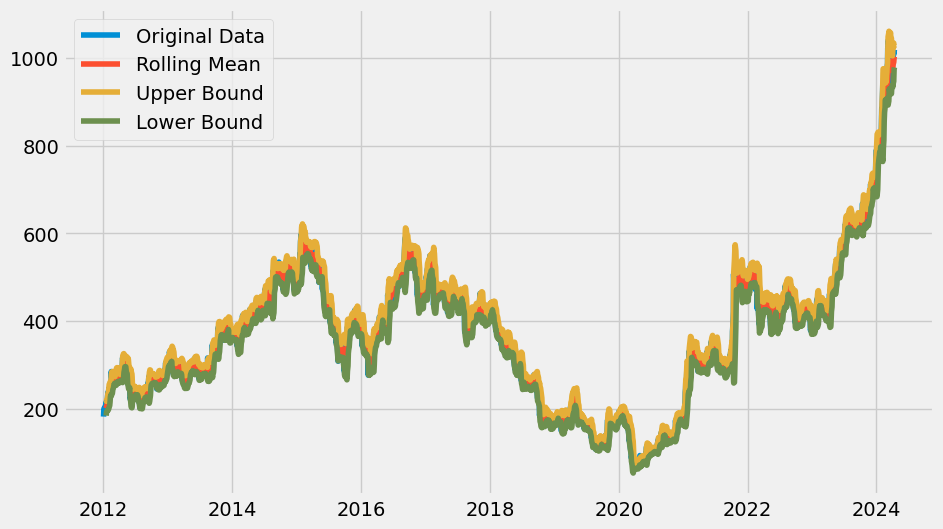

In [48]:


# Calculate rolling mean and standard deviation of the closing prices
rolling_mean = stock_data['Close'].rolling(window=12).mean()
rolling_std = stock_data['Close'].rolling(window=12).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_mean + 2 * rolling_std, label='Upper Bound')
plt.plot(rolling_mean - 2 * rolling_std, label='Lower Bound')
plt.legend(loc='best')
plt.show()


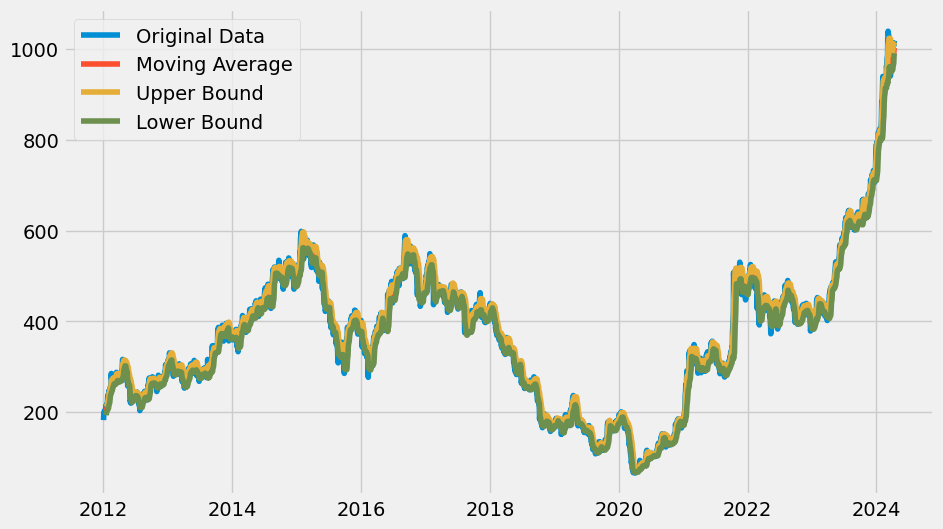

In [49]:


# Calculate the moving average and standard deviation of the closing prices
moving_average = stock_data['Close'].rolling(window=12).mean()
standard_deviation = stock_data['Close'].rolling(window=12).std()

# Plot the moving average and standard deviation
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Original Data')
plt.plot(moving_average, label='Moving Average')
plt.plot(moving_average + standard_deviation, label='Upper Bound')
plt.plot(moving_average - standard_deviation, label='Lower Bound')
plt.legend(loc='best')
plt.show()


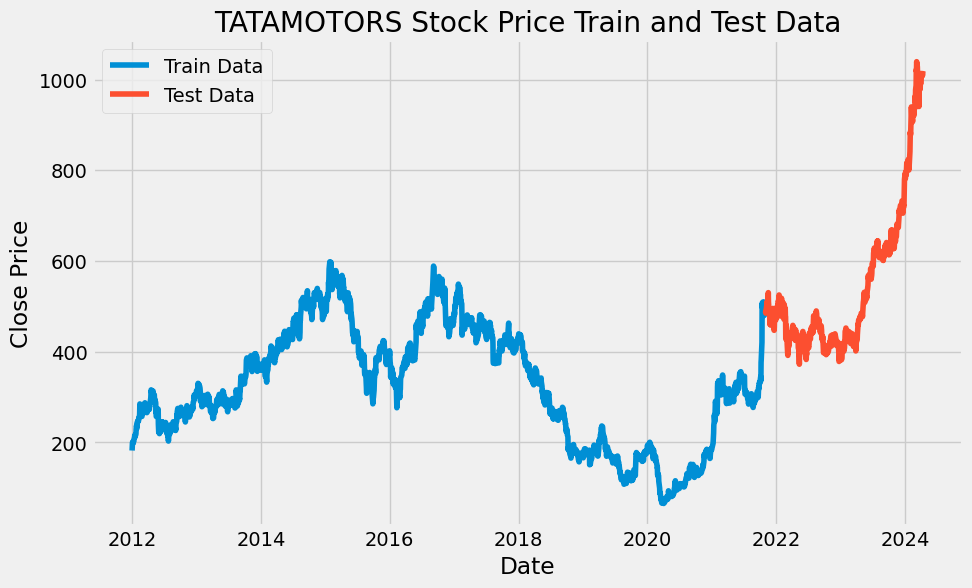

In [50]:


# Split the data into training and test sets
train_data, test_data = stock_data[:int(0.8 * len(stock_data))], stock_data[int(0.8 * len(stock_data)):]

# Visualize the train and test data
plt.figure(figsize=(10,6))
plt.plot(train_data['Close'], label='Train Data')
plt.plot(test_data['Close'], label='Test Data')
plt.title('TATAMOTORS Stock Price Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
76/76 [==============================] - 8s 10ms/step - loss: 0.0309
Epoch 2/10
76/76 [==============================] - 1s 9ms/step - loss: 0.0055
Epoch 3/10
76/76 [==============================] - 1s 11ms/step - loss: 4.6246e-04
Epoch 4/10
76/76 [==============================] - 1s 10ms/step - loss: 5.2722e-05
Epoch 5/10
76/76 [==============================] - 1s 10ms/step - loss: 4.7111e-05
Epoch 6/10
76/76 [==============================] - 1s 11ms/step - loss: 4.3010e-05
Epoch 7/10
76/76 [==============================] - 1s 10ms/step - loss: 3.7501e-05
Epoch 8/10
76/76 [==============================] - 1s 10ms/step - loss: 3.2014e-05
Epoch 9/10
76/76 [==============================] - 1s 11ms/step - loss: 2.6560e-05
Epoch 10/10
19/19 [==============================] - 3s 9ms/step


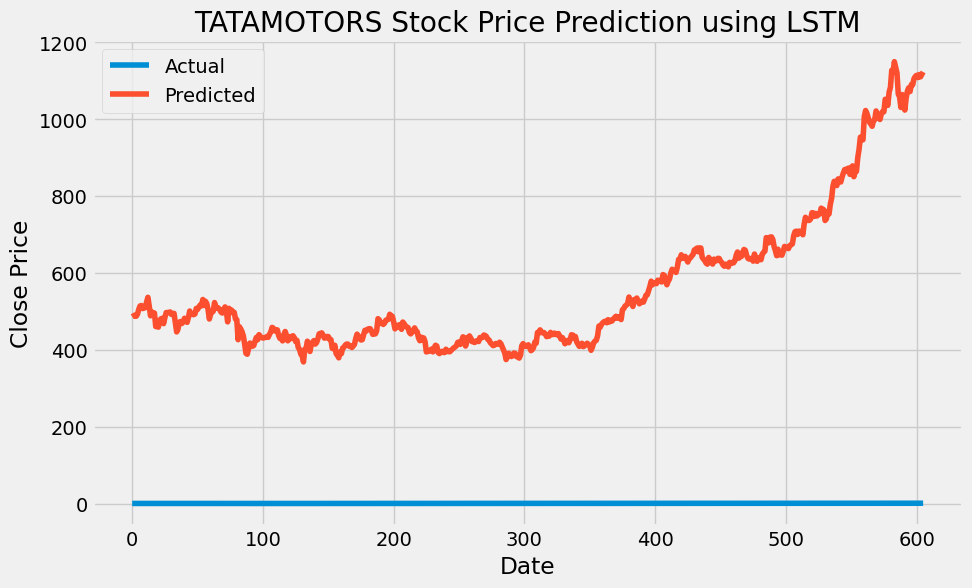

In [51]:

# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

# Split the data into train and test sets
train_data, test_data = scaled_data[:int(0.8 * len(scaled_data))], scaled_data[int(0.8 * len(scaled_data)):]

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_data, train_data, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(test_data)

# Un-normalize the predictions
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('TATAMOTORS Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


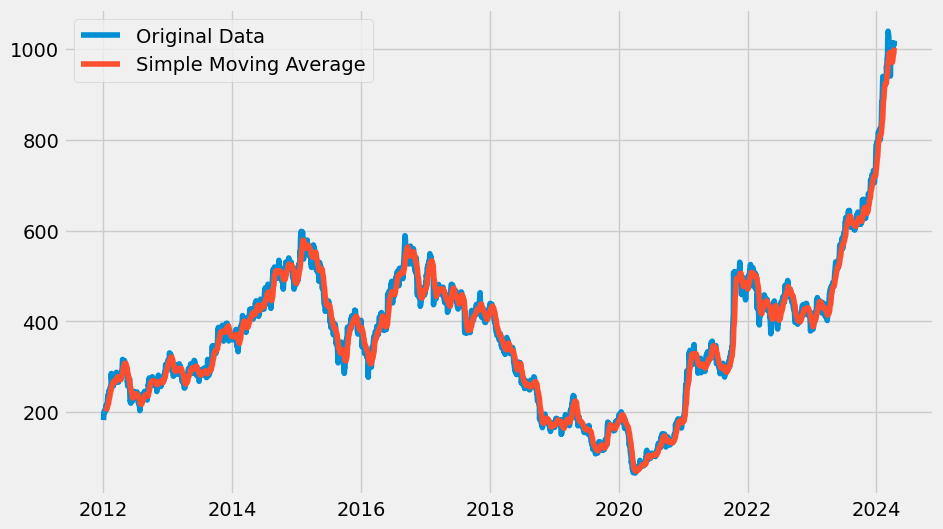

In [52]:


# Calculate the simple moving average
simple_moving_average = stock_data['Close'].rolling(window=12).mean()

# Plot the simple moving average
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Original Data')
plt.plot(simple_moving_average, label='Simple Moving Average')
plt.legend(loc='best')
plt.show()


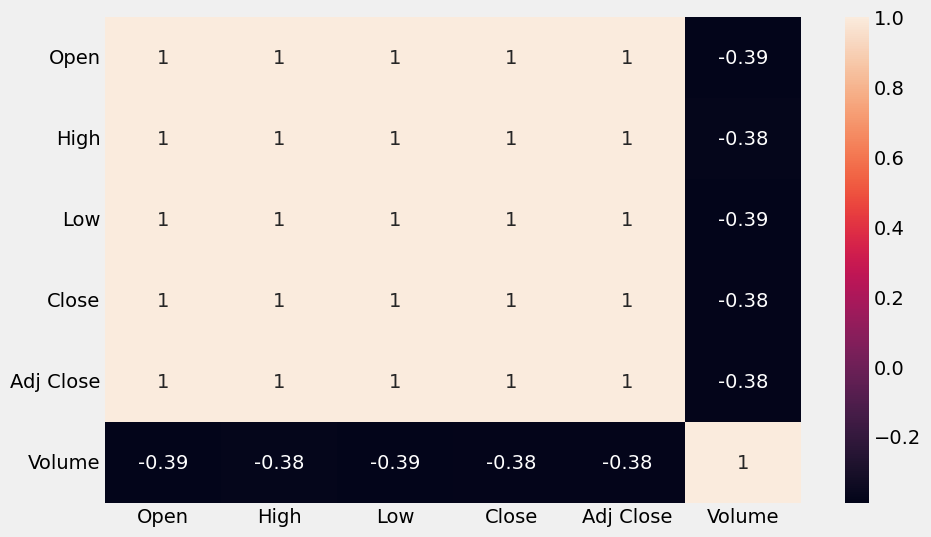

In [53]:


# Calculate the correlation matrix
correlation_matrix = stock_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


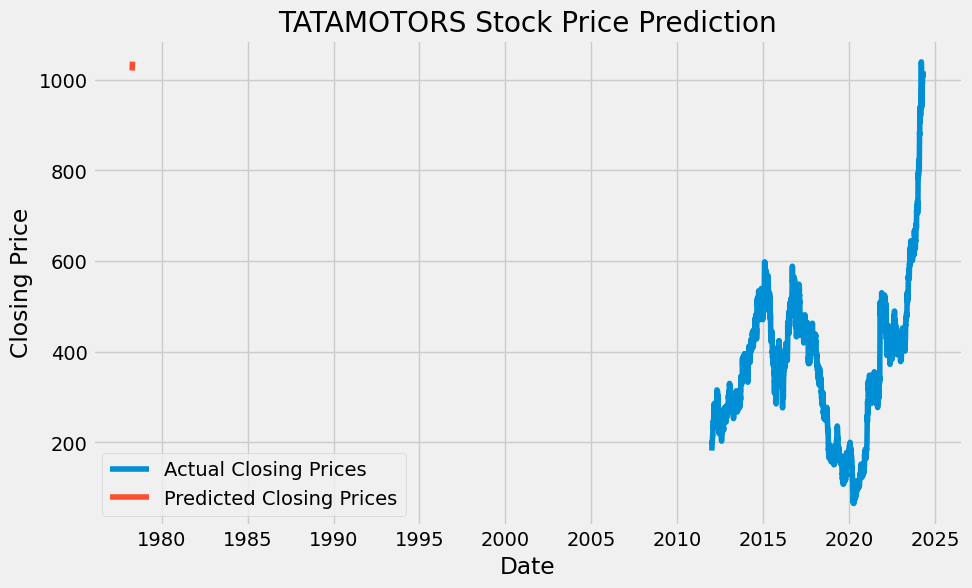

In [56]:


# Import necessary libraries
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual closing prices
ax.plot(stock_data['Close'], label='Actual Closing Prices')

# Plot the predicted closing prices
ax.plot(forecast, label='Predicted Closing Prices')

# Set the title and axis labels
ax.set_title('TATAMOTORS Stock Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Add a legend
ax.legend()

# Show the plot
plt.show()
